In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("./xlsx/시차상관분석6Data.xlsx",index_col=0)
df = df.set_index("DateTime")

# 대비 계산
df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['스왑포인트_1M'] = df['M1_스왑포인트']/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

In [2]:
df.rename({ '1Y_전일비_irs' : '대비_irs_1Y', '2Y_전일비_irs' :'대비_irs_2Y','3Y_전일비_irs':'대비_irs_3Y', '5Y_전일비_irs' : '대비_irs_5Y', '10Y_전일비_irs' : '대비_irs_10Y',
           '1Y_전일비_crs' :'대비_crs_1Y', '2Y_전일비_crs' :'대비_crs_2Y','3Y_전일비_crs' : '대비_crs_3Y', '5Y_전일비_crs' :'대비_crs_5Y', '10Y_전일비_crs' : '대비_crs_10Y','전일비_ndf' :'대비_ndf'}, axis=1, inplace=True)


# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y','대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]]  

# 결측치 제거
df_1 = df_1.dropna()    

In [3]:
df_1

,대비_irs_1Y,대비_irs_2Y,대비_irs_3Y,대비_irs_5Y,대비_irs_10Y,대비_crs_1Y,대비_crs_2Y,대비_crs_3Y,대비_crs_5Y,대비_crs_10Y,...,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,대비_ndf,스왑포인트_1M,전일종가_ex,종가_ex,종가_NDF_차이
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,...,-0.02,-0.07,-0.07,-0.02,-0.01,4.00,0.0240,1131.7,1134.8,-6.30
2012-08-06,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,...,0.01,0.00,0.00,0.01,0.01,-9.50,0.0240,1134.8,1129.0,6.30
2012-08-07,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,...,0.00,0.00,0.00,-0.01,-0.01,0.50,0.0250,1129.0,1128.8,0.00
2012-08-08,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,...,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,0.0240,1128.8,1128.3,-1.45
2012-08-09,0.05,0.06,0.06,0.05,0.04,0.09,0.040,0.04,0.04,0.04,...,0.06,0.05,0.05,0.04,0.06,2.25,0.0235,1128.3,1125.5,-4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,-0.11,...,-0.06,-0.07,-0.09,-0.01,-0.05,3.35,-0.0060,1313.0,1313.7,3.15
2022-07-26,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,-0.02,...,-0.03,-0.02,-0.03,0.01,0.00,1.15,-0.0070,1313.7,1307.6,2.70
2022-07-27,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,-0.01,...,-0.03,-0.05,-0.06,0.02,-0.01,-0.50,-0.0055,1307.6,1313.3,-2.90


In [4]:
x = df_1[[ '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           ]]
y = df_1['종가_ex']

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_16672\3177705331.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,대비_swapbasis_1Y,대비_swapbasis_2Y,대비_swapbasis_3Y,대비_swapbasis_5Y,대비_swapbasis_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,대비_ndf,스왑포인트_1M,전일종가_ex
DateTime,,,,,,,,,,,,,,
2012-08-03,0.348821,0.287540,0.157678,-0.910053,-2.158273,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.125961,0.686282,1.820638,-0.056282
2012-08-06,-0.350742,-0.873325,-0.803045,-1.091422,-0.831869,0.563092,0.159979,0.000440,-0.000209,0.107313,0.123726,-1.668663,1.820638,-0.000487
2012-08-07,0.173930,0.287540,-0.002443,-1.454160,-1.660871,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.125961,0.075741,1.911215,-0.104877
2012-08-08,-0.000961,-0.389631,-0.322684,-0.728685,-1.163470,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.125961,0.206571,1.820638,-0.108476
2012-08-09,0.698602,-0.389631,-0.322684,-0.184578,-0.002867,2.825583,0.966767,1.351270,1.284529,0.432293,0.747946,0.381012,1.775350,-0.117475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.700523,-0.196154,-0.002443,-0.365947,-0.002867,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.625337,0.572896,-0.896666,3.206786
2022-07-26,0.348821,-0.196154,-0.002443,0.178159,0.162934,0.563092,-0.485451,-0.539892,-0.771052,0.107313,-0.001117,0.189127,-0.987243,3.219385
2022-07-27,0.348821,0.771234,0.798160,0.903634,0.826135,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,-0.125961,-0.098699,-0.851378,3.109596


c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


[Text(0, 0.5, '대비_swapbasis_1Y'),
 Text(0, 1.5, '대비_swapbasis_2Y'),
 Text(0, 2.5, '대비_swapbasis_3Y'),
 Text(0, 3.5, '대비_swapbasis_5Y'),
 Text(0, 4.5, '대비_swapbasis_10Y'),
 Text(0, 5.5, '대비_국고_1Y'),
 Text(0, 6.5, '대비_국고_3Y'),
 Text(0, 7.5, '대비_국고_5Y'),
 Text(0, 8.5, '대비_국고_10Y'),
 Text(0, 9.5, '대비_통안_1Y'),
 Text(0, 10.5, '대비_통안_2Y'),
 Text(0, 11.5, '대비_ndf'),
 Text(0, 12.5, '스왑포인트_1M'),
 Text(0, 13.5, '전일종가_ex')]

c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\hyeok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


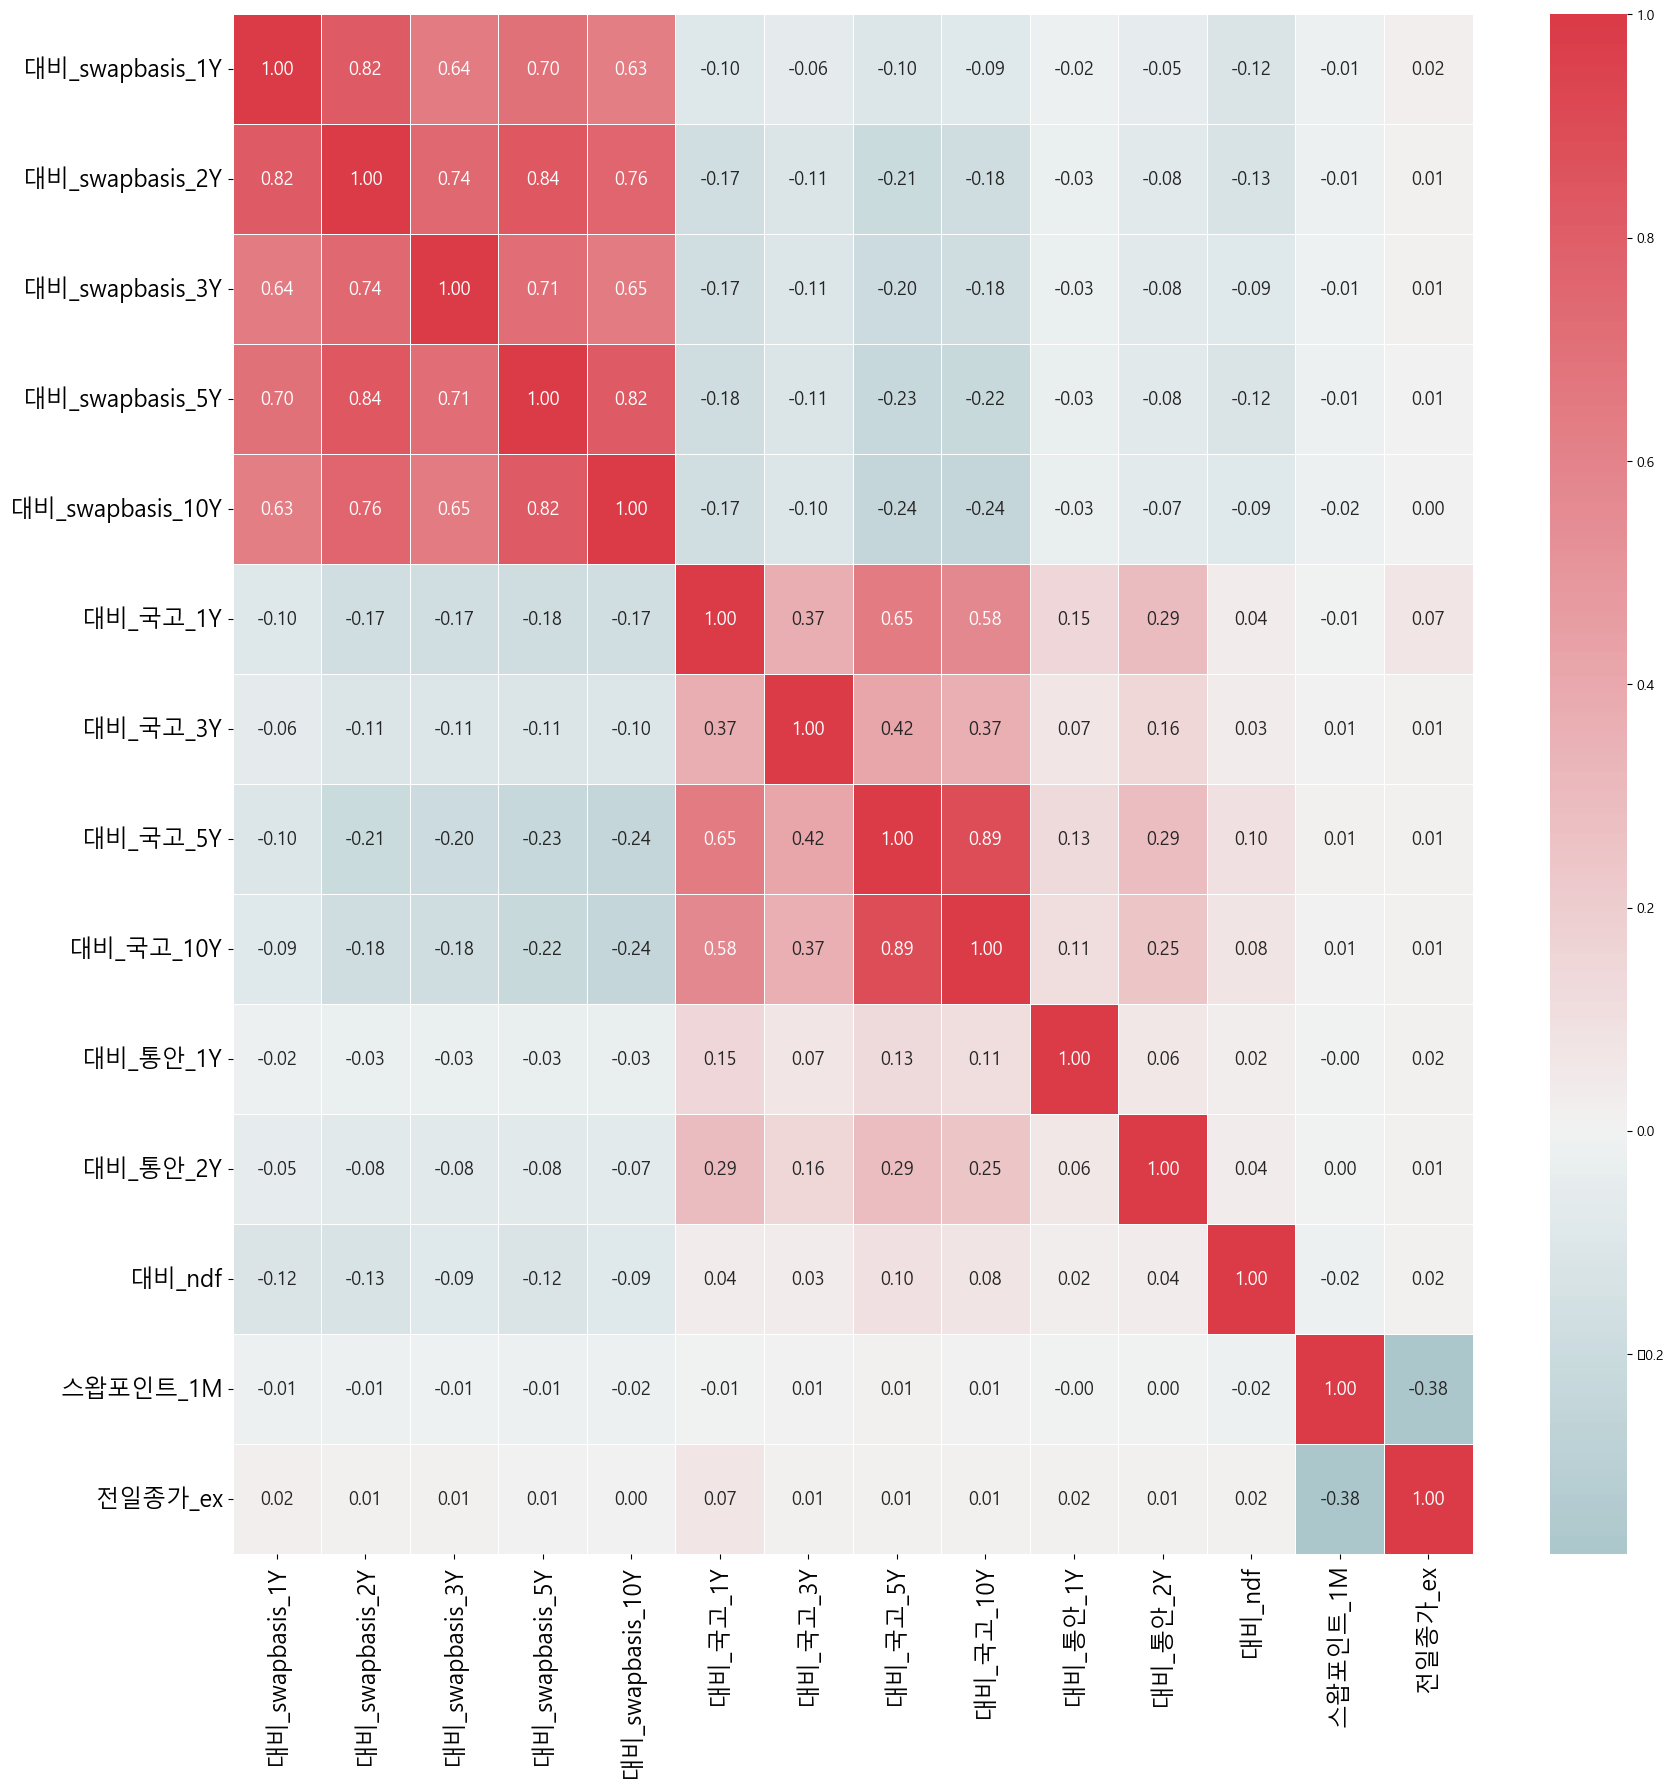

In [5]:
# 히트맵 그리기
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp 
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(210, 10, as_cmap=True)

res= sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0, annot_kws = {'size' : 13})

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 17)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 17)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor           Feature
0     3.156830   대비_swapbasis_1Y
1     5.913226   대비_swapbasis_2Y
2     2.406082   대비_swapbasis_3Y
3     4.766315   대비_swapbasis_5Y
4     3.270022  대비_swapbasis_10Y
5     1.832973          대비_국고_1Y
6     1.243944          대비_국고_3Y
7     5.823271          대비_국고_5Y
8     4.883435         대비_국고_10Y
9     1.024826          대비_통안_1Y
10    1.113971          대비_통안_2Y
11    1.028486            대비_ndf
12    1.169340          스왑포인트_1M
13    1.178408           전일종가_ex


In [7]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.184e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:07:05   Log-Likelihood:                -7421.6
No. Observations:                2458   AIC:                         1.487e+04
Df Residuals:                    2443   BIC:                         1.496e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.100   1.13e+04      0.000    1134.699    1135.092
대비_swapbasis_1Y     -1.2019      0.178     -6.748      0.000      -1.551      -0.853
대비_swapbasis_2Y      0.0140      0.244      0.057      0.954      -0.464       0.492
대비_swapbasis_3Y     -0.2029      0.156     -1.305      0.192      -0.508       0.102
대비_swapbasis_5Y      0.2616      0.219      1.195      0.232      -0.168       0.691
대비_swapbasis_10Y     0.1530      0.181      0.844      0.399      -0.203       0.508
대비_국고_1Y             0.0693      0.136      0.511      0.609      -0.197       0.335
대비_국고_3Y            -0.2896      0.112     -2.590      0.010      -0.509      -0.070
대비_국고_5Y             0.2410      0.242      0.996      0.319      -0.233       0.715
대비_국고_10Y           -0.1365      0.222     -0.616      0.538      -0.571       0.298
대비_통안_1Y            -0.0471      0.101     -0.464      0.642      -0.246       0.152
대비_통안_2Y             0.0547      0.106      0.517      0.605      -0.153       0.262
대비_ndf               2.4762      0.102     24.356      0.000       2.277       2.676
스왑포인트_1M            -0.1131      0.108     -1.044      0.297      -0.326       0.099
전일종가_ex             55.3022      0.109    508.163      0.000      55.089      55.516
==============================================================================
Omnibus:                       69.692   Durbin-Watson:                   2.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.434
Skew:                           0.068   Prob(JB):                     4.39e-37
Kurtosis:                       4.271   Cond. No.                         6.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor           Feature
0     3.156724   대비_swapbasis_1Y
1     5.912831   대비_swapbasis_2Y
2     2.406082   대비_swapbasis_3Y
3     4.766154   대비_swapbasis_5Y
4     3.269991  대비_swapbasis_10Y
5     1.820569          대비_국고_1Y
6     1.243885          대비_국고_3Y
7     5.820584          대비_국고_5Y
8     4.883432         대비_국고_10Y
9     1.113858          대비_통안_2Y
10    1.028238            대비_ndf
11    1.169324          스왑포인트_1M
12    1.178310           전일종가_ex


In [9]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.353e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:07:05   Log-Likelihood:                -7421.7
No. Observations:                2458   AIC:                         1.487e+04
Df Residuals:                    2444   BIC:                         1.495e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.100   1.13e+04      0.000    1134.699    1135.092
대비_swapbasis_1Y     -1.2015      0.178     -6.746      0.000      -1.551      -0.852
대비_swapbasis_2Y      0.0130      0.244      0.053      0.957      -0.465       0.491
대비_swapbasis_3Y     -0.2030      0.155     -1.305      0.192      -0.508       0.102
대비_swapbasis_5Y      0.2622      0.219      1.198      0.231      -0.167       0.691
대비_swapbasis_10Y     0.1527      0.181      0.842      0.400      -0.203       0.508
대비_국고_1Y             0.0642      0.135      0.474      0.635      -0.201       0.329
대비_국고_3Y            -0.2899      0.112     -2.593      0.010      -0.509      -0.071
대비_국고_5Y             0.2386      0.242      0.987      0.324      -0.236       0.713
대비_국고_10Y           -0.1364      0.222     -0.616      0.538      -0.571       0.298
대비_통안_2Y             0.0542      0.106      0.512      0.609      -0.153       0.262
대비_ndf               2.4755      0.102     24.355      0.000       2.276       2.675
스왑포인트_1M            -0.1133      0.108     -1.045      0.296      -0.326       0.099
전일종가_ex             55.3017      0.109    508.261      0.000      55.088      55.515
==============================================================================
Omnibus:                       69.545   Durbin-Watson:                   2.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.979
Skew:                           0.067   Prob(JB):                     5.51e-37
Kurtosis:                       4.270   Cond. No.                         6.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
x_scaled.drop(['대비_국고_1Y', '대비_통안_2Y', '대비_swapbasis_5Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.060e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:07:05   Log-Likelihood:                -7422.7
No. Observations:                2458   AIC:                         1.487e+04
Df Residuals:                    2447   BIC:                         1.493e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.100   1.13e+04      0.000    1134.699    1135.092
대비_swapbasis_1Y     -1.1940      0.178     -6.709      0.000      -1.543      -0.845
대비_swapbasis_2Y      0.1181      0.225      0.525      0.600      -0.323       0.560
대비_swapbasis_3Y     -0.1760      0.153     -1.148      0.251      -0.477       0.125
대비_swapbasis_10Y     0.2627      0.159      1.657      0.098      -0.048       0.574
대비_국고_3Y            -0.2799      0.111     -2.530      0.011      -0.497      -0.063
대비_국고_5Y             0.2876      0.228      1.263      0.207      -0.159       0.734
대비_국고_10Y           -0.1394      0.221     -0.630      0.529      -0.574       0.295
대비_ndf               2.4706      0.101     24.343      0.000       2.272       2.670
스왑포인트_1M            -0.1125      0.108     -1.039      0.299      -0.325       0.100
전일종가_ex             55.3058      0.108    510.344      0.000      55.093      55.518
==============================================================================
Omnibus:                       68.895   Durbin-Watson:                   2.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.094
Skew:                           0.056   Prob(JB):                     8.57e-37
Kurtosis:                       4.269   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
x_scaled.drop(['대비_swapbasis_2Y', '대비_swapbasis_3Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.826e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:07:05   Log-Likelihood:                -7423.4
No. Observations:                2458   AIC:                         1.486e+04
Df Residuals:                    2449   BIC:                         1.492e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.100   1.13e+04      0.000    1134.699    1135.092
대비_swapbasis_1Y     -1.1964      0.130     -9.217      0.000      -1.451      -0.942
대비_swapbasis_10Y     0.2410      0.133      1.815      0.070      -0.019       0.501
대비_국고_3Y            -0.2783      0.110     -2.519      0.012      -0.495      -0.062
대비_국고_5Y             0.2924      0.227      1.288      0.198      -0.153       0.738
대비_국고_10Y           -0.1395      0.221     -0.630      0.529      -0.574       0.294
대비_ndf               2.4682      0.101     24.359      0.000       2.269       2.667
스왑포인트_1M            -0.1125      0.108     -1.038      0.299      -0.325       0.100
전일종가_ex             55.3057      0.108    510.415      0.000      55.093      55.518
==============================================================================
Omnibus:                       68.541   Durbin-Watson:                   2.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.688
Skew:                           0.056   Prob(JB):                     1.73e-36
Kurtosis:                       4.263   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x_scaled.drop(['대비_국고_10Y', '스왑포인트_1M'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:07:05   Log-Likelihood:                -7424.1
No. Observations:                2458   AIC:                         1.486e+04
Df Residuals:                    2451   BIC:                         1.490e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.100   1.13e+04      0.000    1134.699    1135.092
대비_swapbasis_1Y     -1.2012      0.130     -9.267      0.000      -1.455      -0.947
대비_swapbasis_10Y     0.2494      0.132      1.884      0.060      -0.010       0.509
대비_국고_3Y            -0.2774      0.110     -2.512      0.012      -0.494      -0.061
대비_국고_5Y             0.1673      0.114      1.470      0.142      -0.056       0.390
대비_ndf               2.4712      0.101     24.402      0.000       2.273       2.670
전일종가_ex             55.3482      0.100    552.121      0.000      55.152      55.545
==============================================================================
Omnibus:                       68.152   Durbin-Watson:                   2.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.607
Skew:                           0.053   Prob(JB):                     2.97e-36
Kurtosis:                       4.259   Cond. No.                         2.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x_scaled.drop(['대비_swapbasis_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.117e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:07:05   Log-Likelihood:                -7425.9
No. Observations:                2458   AIC:                         1.486e+04
Df Residuals:                    2452   BIC:                         1.490e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1134.8952      0.100   1.13e+04      0.000    1134.699    1135.092
대비_swapbasis_1Y    -1.0489      0.101    -10.345      0.000      -1.248      -0.850
대비_국고_3Y           -0.2749      0.110     -2.488      0.013      -0.492      -0.058
대비_국고_5Y            0.1218      0.111      1.095      0.274      -0.096       0.340
대비_ndf              2.4709      0.101     24.386      0.000       2.272       2.670
전일종가_ex            55.3463      0.100    551.843      0.000      55.150      55.543
==============================================================================
Omnibus:                       71.289   Durbin-Watson:                   2.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.633
Skew:                           0.053   Prob(JB):                     7.27e-39
Kurtosis:                       4.305   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 27.416524619389964, RMSE :  5.236, MAE: 5.236
Variance score :  0.991


In [15]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(5.0428664296575905,
 array([4.16460577, 5.98048579, 5.16395234, 5.38465695, 4.52063129]),
 array([-17.34394125, -35.7662103 , -26.66640381, -28.99453046,
        -20.43610726]))